# Linear Regression with Ridge Regularization
##### <div style='text-align:right'>made by Wonbin Kim</div>

In [1]:
import numpy as np
from example import plotting, example3, example4
%matplotlib inline

# Dataset 3. More Complex Toy data

# 2. Ridge Regression

### <center>\\(\mathcal{J}_{Ridge}(\mathbf{w})= \frac{1}{2N}||y-\phi^T\mathbf{w}||^2_2+\frac{\lambda}{2}||\mathbf{w}||^2_2\\)</center>
<img src='image/pic10.png'>

### Find <center> \\( \hat{\mathbf{w}}_{Ridge} = \arg \min\limits_{\mathbf{W}} \frac{1}{2}||y-\phi^T\mathbf{w}||^2_2+\frac{\lambda_N}{2}||\mathbf{w}||^2_2\\) </center>

where $\lambda$ is trade off parameter(between LS and Regularizer), $\phi(x) \in \mathbb{R}^{d\times N}$ , $y \in \mathbb{R}^{k \times N}$, and $\mathbf{w} \in \mathbb{R}^{k\times d}$. N, d, k denote the number of instances, the dimensionality of covariate X, and the dimentionality of response Y, respectively.

### Caution!

For implementational simplicity, X is transposed in practice. i.e. $ x \in \mathbb{R}^{N\times D}$, a row represents a instance.

In [2]:
# Objective function
def ls(x, y, w, b = 0., l=1.):
    out = np.square(y-np.dot(x, w)-b)
    if len(out.shape) == 2: 
        out = np.sum(out, axis=1)
    return 0.5*np.mean(out)+0.5*l*np.sum(np.square(w))

### 구현 2. w를 구하는 numpy code 구성하고, y의 prediction 값 구하기

## <center>\\(\mathbf{w}_{ML} = \left(\Phi^T\Phi+\lambda I\right)^{-1}\Phi^T\mathbf{t}\\)</center>

> 이 때 $\Phi$는 Design matrix로 다음과 같다. \begin{equation} 
    \Phi =
        \left(
            \begin{matrix}
                \phi_0(x_1) & \phi_1(x_1) & \cdots & \phi_{M-1}(x_1)\\
                \phi_0(x_2) & \phi_1(x_2) & \cdots & \phi_{M-1}(x_1)\\
                \vdots & \vdots & \ddots & \vdots \\
                \phi_0(x_N) & \phi_x(x_N) & \cdots & \phi_{M-1}(x_N)
            \end{matrix}
        \right)
\end{equation}

Hint : np.dot, np.linalg.pinv, np.transpose, np.eye

In [3]:
def find_w(x, y, l = 1.):
    x_mtx = np.dot(x.T, x)
    shape = x_mtx.shape
    inv_x_mtx = np.linalg.inv(x_mtx+ l*np.eye(shape[0]))
    w = np.dot(inv_x_mtx, np.dot(x.T, y))
    return w

In [4]:
l = 5.

## (2) Polynomial basis function with Numpy

### <center> \\( \phi_j(x) = x^j\\) </center>

### <center>\\(\phi(x) = [x^m, x^{m-1}, ... , x^1, 1]\\)</center>

In [5]:
def powers(X, degree=1):
    Xs = []
    for i in range(degree, -1, -1):
        Xs.append(X**i) if i else Xs.append(np.ones_like(X[:,0])[:,np.newaxis])
    
    return np.concatenate(Xs, axis=1)

In [6]:
train_X, train_Y, test_X, test_Y, whole_X, whole_Y = example3(False)

## By sklearn

5.209721925993172
13.355854567002243


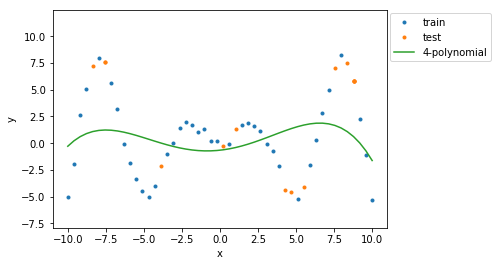

In [7]:
new_train_X = powers(train_X, 4)
new_test_X = powers(test_X, 4)
new_whole_X = powers(whole_X, 4)
from sklearn import linear_model
rid = linear_model.Ridge(alpha=l)
rid.fit(new_train_X, train_Y)
pred_y = rid.predict(new_whole_X)
w_ls = rid.coef_
b_ls = rid.intercept_
print(ls(new_train_X, train_Y, w_ls.T, b_ls))
print(ls(new_test_X, test_Y, w_ls.T, b_ls))
plotting([train_X, test_X, whole_X],
         [train_Y, test_Y, pred_y], label=['train', 'test', '4-polynomial'])

### Comparing experiments

In [8]:
def compare(train_x, train_y, test_x, test_y, whole_x, lamb, degree = 4, ):
    exp = []
    for i in range(1, degree+1, 1):
        t_X_i = powers(train_x, i)
        te_X_i = powers(test_x, i)
        w_X_i = powers(whole_x, i)
        w_ls = find_w(t_X_i, train_y, l=lamb)
        pred_y = np.dot(w_X_i, w_ls)
        train_loss = ls(t_X_i, train_y, w_ls,l=lamb)
        test_loss = ls(te_X_i, test_y, w_ls,l=lamb)
        exp.append({'pred_y':pred_y,
                    'whole':w_X_i, 
                    'train_loss':train_loss,
                    'test_loss':test_loss})
    for i in range(degree):
        print("Degree : [{}], train loss : [{:.3f}], test_loss : [{:.3f}]".format(i+1,
            exp[i]['train_loss'], exp[i]['test_loss']))    
    plotting([train_x, test_x]+ degree*[whole_x],
         [train_y, test_y]+[exp[i]['pred_y'] for i in range(degree)],
         label=['train', 'test','linear']+['{}-polynomial'.format(i+2) for i in range(degree-1)])

Degree : [1], train loss : [5.581], test_loss : [14.541]
Degree : [2], train loss : [5.568], test_loss : [13.838]
Degree : [3], train loss : [5.507], test_loss : [14.571]
Degree : [4], train loss : [5.194], test_loss : [13.350]
Degree : [5], train loss : [5.171], test_loss : [13.668]
Degree : [6], train loss : [1.255], test_loss : [1.511]
Degree : [7], train loss : [1.255], test_loss : [1.509]


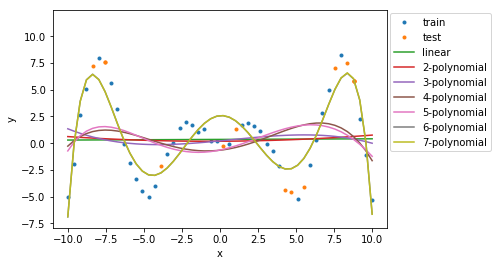

Degree : [1], train loss : [5.581], test_loss : [14.541]
Degree : [2], train loss : [5.568], test_loss : [13.838]
Degree : [3], train loss : [5.507], test_loss : [14.571]
Degree : [4], train loss : [5.194], test_loss : [13.350]
Degree : [5], train loss : [5.171], test_loss : [13.668]
Degree : [6], train loss : [1.256], test_loss : [1.512]
Degree : [7], train loss : [1.256], test_loss : [1.509]


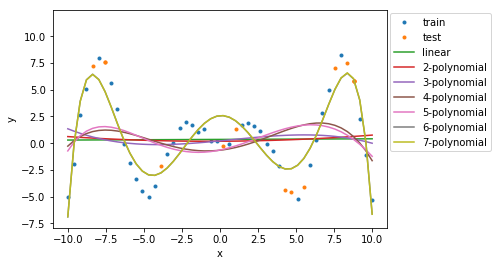

Degree : [1], train loss : [5.581], test_loss : [14.541]
Degree : [2], train loss : [5.568], test_loss : [13.838]
Degree : [3], train loss : [5.507], test_loss : [14.571]
Degree : [4], train loss : [5.194], test_loss : [13.350]
Degree : [5], train loss : [5.171], test_loss : [13.669]
Degree : [6], train loss : [1.259], test_loss : [1.515]
Degree : [7], train loss : [1.259], test_loss : [1.512]


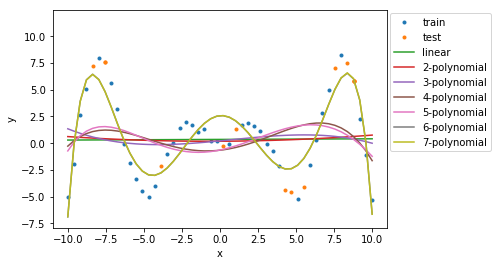

Degree : [1], train loss : [5.581], test_loss : [14.542]
Degree : [2], train loss : [5.568], test_loss : [13.838]
Degree : [3], train loss : [5.508], test_loss : [14.572]
Degree : [4], train loss : [5.196], test_loss : [13.353]
Degree : [5], train loss : [5.173], test_loss : [13.671]
Degree : [6], train loss : [1.290], test_loss : [1.546]
Degree : [7], train loss : [1.290], test_loss : [1.543]


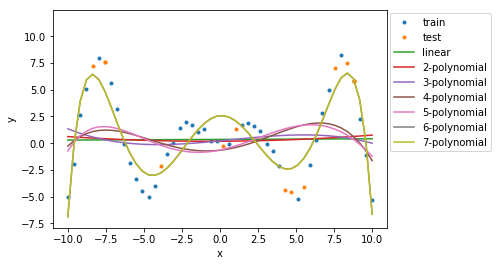

Degree : [1], train loss : [5.587], test_loss : [14.550]
Degree : [2], train loss : [5.569], test_loss : [13.839]
Degree : [3], train loss : [5.511], test_loss : [14.573]
Degree : [4], train loss : [5.217], test_loss : [13.378]
Degree : [5], train loss : [5.195], test_loss : [13.698]
Degree : [6], train loss : [1.597], test_loss : [1.850]
Degree : [7], train loss : [1.598], test_loss : [1.848]


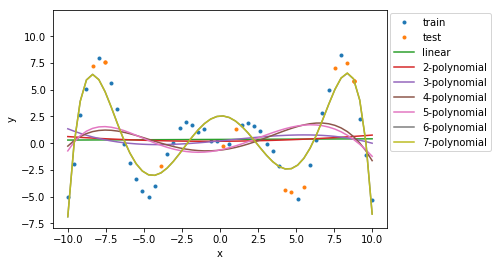

Degree : [1], train loss : [5.640], test_loss : [14.625]
Degree : [2], train loss : [5.583], test_loss : [13.845]
Degree : [3], train loss : [5.538], test_loss : [14.588]
Degree : [4], train loss : [5.393], test_loss : [13.602]
Degree : [5], train loss : [5.390], test_loss : [13.933]
Degree : [6], train loss : [4.063], test_loss : [4.289]
Degree : [7], train loss : [4.060], test_loss : [4.289]


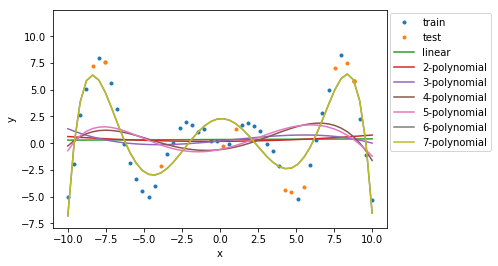

Degree : [1], train loss : [5.975], test_loss : [15.137]
Degree : [2], train loss : [5.639], test_loss : [13.854]
Degree : [3], train loss : [5.693], test_loss : [14.657]
Degree : [4], train loss : [5.972], test_loss : [14.425]
Degree : [5], train loss : [6.146], test_loss : [14.866]
Degree : [6], train loss : [9.158], test_loss : [9.236]
Degree : [7], train loss : [9.033], test_loss : [9.171]


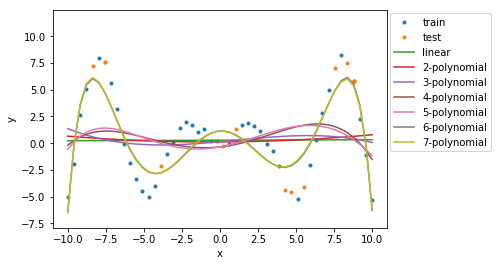

Degree : [1], train loss : [6.096], test_loss : [15.763]
Degree : [2], train loss : [5.618], test_loss : [13.758]
Degree : [3], train loss : [6.009], test_loss : [14.742]
Degree : [4], train loss : [6.283], test_loss : [14.880]
Degree : [5], train loss : [6.432], test_loss : [15.054]
Degree : [6], train loss : [9.392], test_loss : [9.451]
Degree : [7], train loss : [9.036], test_loss : [9.353]


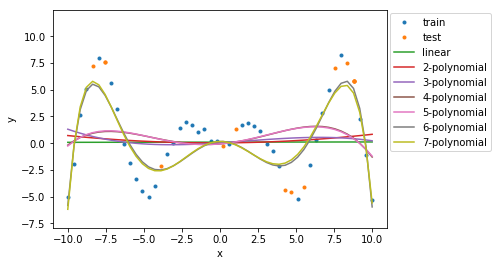

Degree : [1], train loss : [5.724], test_loss : [15.630]
Degree : [2], train loss : [5.617], test_loss : [13.769]
Degree : [3], train loss : [5.891], test_loss : [14.379]
Degree : [4], train loss : [7.023], test_loss : [15.506]
Degree : [5], train loss : [6.830], test_loss : [15.346]
Degree : [6], train loss : [22.018], test_loss : [23.365]
Degree : [7], train loss : [20.813], test_loss : [23.006]


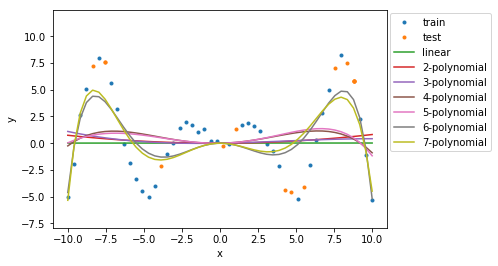

Degree : [1], train loss : [5.651], test_loss : [15.590]
Degree : [2], train loss : [5.824], test_loss : [14.161]
Degree : [3], train loss : [5.846], test_loss : [14.425]
Degree : [4], train loss : [8.215], test_loss : [17.210]
Degree : [5], train loss : [8.272], test_loss : [17.329]
Degree : [6], train loss : [11.398], test_loss : [14.748]
Degree : [7], train loss : [11.697], test_loss : [16.457]


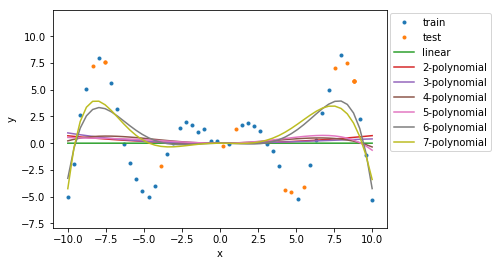

Degree : [1], train loss : [5.643], test_loss : [15.586]
Degree : [2], train loss : [6.235], test_loss : [15.354]
Degree : [3], train loss : [6.202], test_loss : [15.566]
Degree : [4], train loss : [6.280], test_loss : [15.707]
Degree : [5], train loss : [6.319], test_loss : [15.805]
Degree : [6], train loss : [5.532], test_loss : [9.391]
Degree : [7], train loss : [6.634], test_loss : [10.989]


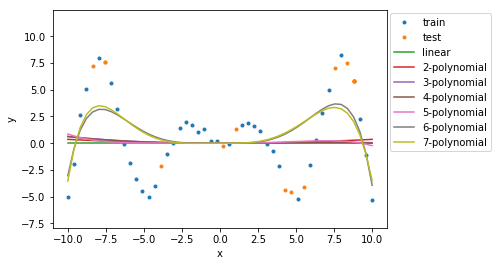

Degree : [1], train loss : [5.642], test_loss : [15.585]
Degree : [2], train loss : [5.817], test_loss : [15.619]
Degree : [3], train loss : [5.840], test_loss : [15.870]
Degree : [4], train loss : [5.734], test_loss : [15.202]
Degree : [5], train loss : [5.725], test_loss : [15.288]
Degree : [6], train loss : [7.959], test_loss : [12.141]
Degree : [7], train loss : [8.017], test_loss : [12.249]


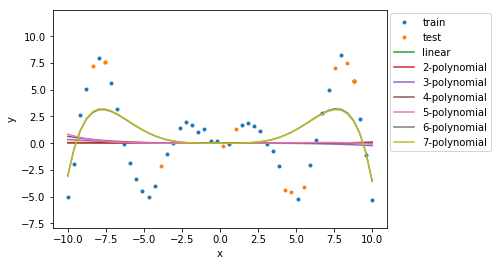

In [9]:
train_X, train_Y, test_X, test_Y, whole_X, whole_Y = example3(False)
for i in range(12):
    compare(train_X, train_Y, test_X, test_Y, whole_X, 10**(i-5),7)

Degree : [1], train loss : [1.140], test_loss : [0.579]
Degree : [2], train loss : [1.094], test_loss : [0.462]
Degree : [3], train loss : [1.086], test_loss : [0.494]
Degree : [4], train loss : [0.819], test_loss : [0.636]
Degree : [5], train loss : [0.818], test_loss : [0.663]
Degree : [6], train loss : [0.797], test_loss : [0.754]


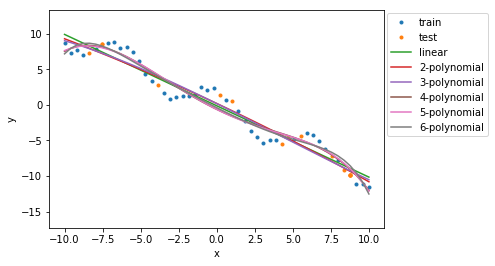

Degree : [1], train loss : [1.140], test_loss : [0.579]
Degree : [2], train loss : [1.095], test_loss : [0.462]
Degree : [3], train loss : [1.086], test_loss : [0.494]
Degree : [4], train loss : [0.819], test_loss : [0.636]
Degree : [5], train loss : [0.818], test_loss : [0.663]
Degree : [6], train loss : [0.797], test_loss : [0.754]


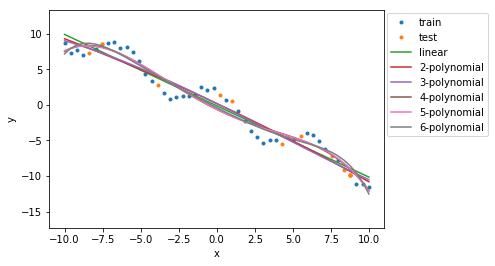

Degree : [1], train loss : [1.141], test_loss : [0.579]
Degree : [2], train loss : [1.095], test_loss : [0.463]
Degree : [3], train loss : [1.087], test_loss : [0.495]
Degree : [4], train loss : [0.820], test_loss : [0.637]
Degree : [5], train loss : [0.819], test_loss : [0.663]
Degree : [6], train loss : [0.797], test_loss : [0.754]


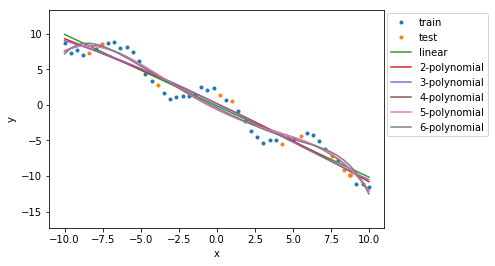

Degree : [1], train loss : [1.145], test_loss : [0.584]
Degree : [2], train loss : [1.100], test_loss : [0.468]
Degree : [3], train loss : [1.092], test_loss : [0.500]
Degree : [4], train loss : [0.827], test_loss : [0.644]
Degree : [5], train loss : [0.826], test_loss : [0.670]
Degree : [6], train loss : [0.803], test_loss : [0.760]


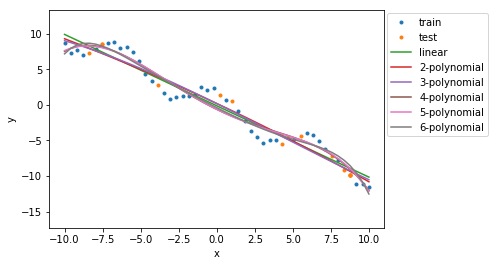

Degree : [1], train loss : [1.191], test_loss : [0.630]
Degree : [2], train loss : [1.147], test_loss : [0.515]
Degree : [3], train loss : [1.143], test_loss : [0.551]
Degree : [4], train loss : [0.893], test_loss : [0.708]
Degree : [5], train loss : [0.895], test_loss : [0.737]
Degree : [6], train loss : [0.863], test_loss : [0.818]


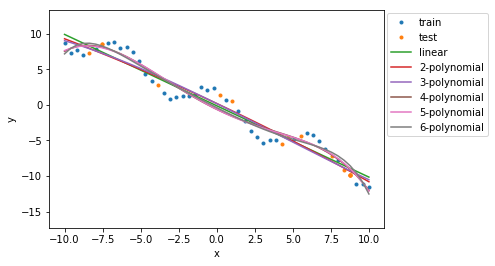

Degree : [1], train loss : [1.650], test_loss : [1.090]
Degree : [2], train loss : [1.613], test_loss : [0.983]
Degree : [3], train loss : [1.649], test_loss : [1.057]
Degree : [4], train loss : [1.524], test_loss : [1.326]
Degree : [5], train loss : [1.546], test_loss : [1.366]
Degree : [6], train loss : [1.428], test_loss : [1.369]


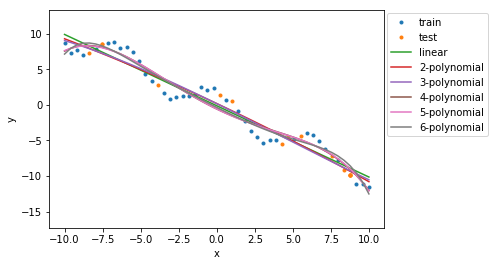

Degree : [1], train loss : [6.133], test_loss : [5.591]
Degree : [2], train loss : [6.132], test_loss : [5.522]
Degree : [3], train loss : [6.256], test_loss : [5.658]
Degree : [4], train loss : [6.316], test_loss : [6.042]
Degree : [5], train loss : [5.732], test_loss : [5.410]
Degree : [6], train loss : [5.444], test_loss : [5.264]


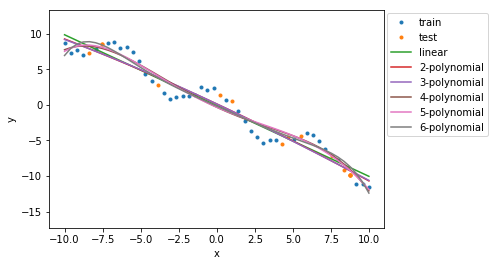

Degree : [1], train loss : [44.451], test_loss : [44.114]
Degree : [2], train loss : [44.742], test_loss : [44.281]
Degree : [3], train loss : [28.232], test_loss : [27.443]
Degree : [4], train loss : [26.870], test_loss : [26.442]
Degree : [5], train loss : [10.999], test_loss : [10.355]
Degree : [6], train loss : [11.077], test_loss : [10.479]


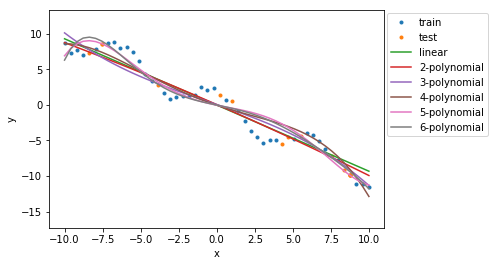

Degree : [1], train loss : [165.631], test_loss : [167.502]
Degree : [2], train loss : [166.018], test_loss : [167.731]
Degree : [3], train loss : [22.256], test_loss : [20.640]
Degree : [4], train loss : [22.090], test_loss : [21.112]
Degree : [5], train loss : [5.615], test_loss : [4.761]
Degree : [6], train loss : [4.839], test_loss : [3.972]


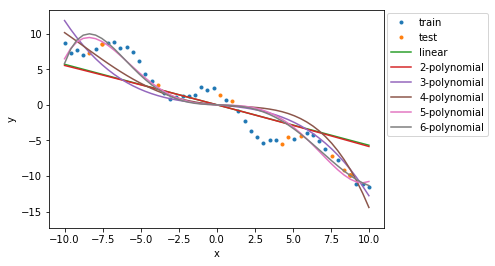

Degree : [1], train loss : [81.944], test_loss : [89.006]
Degree : [2], train loss : [81.668], test_loss : [89.319]
Degree : [3], train loss : [7.795], test_loss : [5.813]
Degree : [4], train loss : [10.306], test_loss : [8.699]
Degree : [5], train loss : [10.134], test_loss : [9.083]
Degree : [6], train loss : [8.097], test_loss : [7.159]


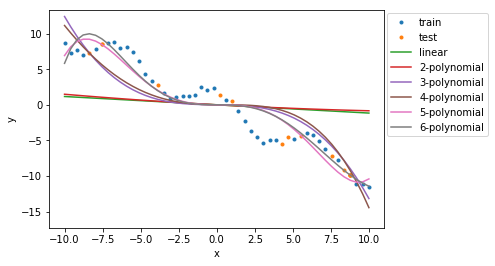

In [10]:
train_X, train_Y, test_X, test_Y, whole_X, whole_Y = example4(False)
for i in range(10):
    compare(train_X, train_Y, test_X, test_Y, whole_X, 10**(i-5),6)